In [2]:
# Load the uploaded file to inspect the data
import pandas as pd

# Define the path to the uploaded dataset
file_path = r"C:\Users\SAIRAM\listings.csv"

# Read the CSV file into a DataFrame
dataset = pd.read_csv(file_path)

# Display the first few rows to inspect the dataset
dataset.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2992450,https://www.airbnb.com/rooms/2992450,20240905032005,2024-09-05,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,4.56,3.22,3.67,NaN,f,1,1,0,0,0.07
1,3820211,https://www.airbnb.com/rooms/3820211,20240905032005,2024-09-05,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.81,4.82,4.78,NaN,f,4,4,0,0,2.49
2,5651579,https://www.airbnb.com/rooms/5651579,20240905032005,2024-09-05,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.87,4.76,4.63,NaN,f,2,1,1,0,3.22
3,6623339,https://www.airbnb.com/rooms/6623339,20240905032005,2024-09-05,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.70,4.80,4.72,NaN,f,4,4,0,0,2.91
4,8035768,https://www.airbnb.com/rooms/8035768,20240905032005,2024-09-05,city scrape,Entire Beautiful French Victorian 1884,Stunningly renovated French Victorian original...,There is a Barbershop with 1900' barber chairs...,https://a0.muscache.com/pictures/103429331/a0a...,42430824,...,4.80,4.74,4.75,NaN,f,2,1,1,0,0.51


In [ ]:
python -m venv venv
venv\Scripts\activate

C:\Users\SAIRAM\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['neighbourhood_group_cleansed' 'calendar_updated' 'license']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Explained Variance Ratio by PCA Components: [1.00000000e+00 2.66388451e-33]


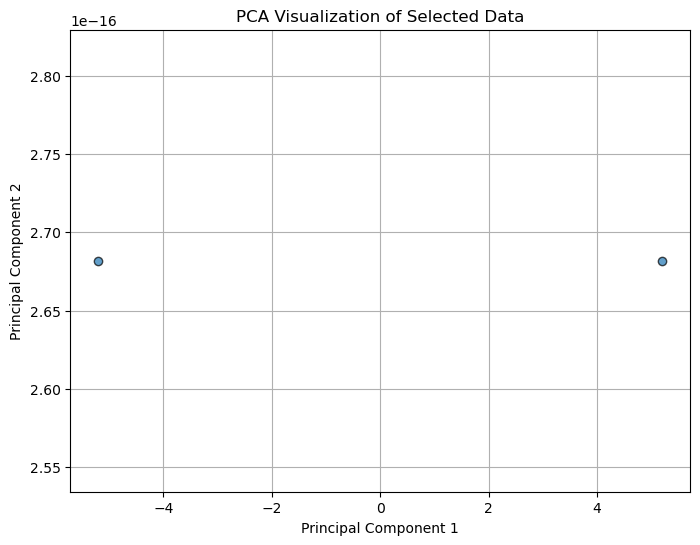

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt



# Select rows between the specified indices (4:5 and 12:13)
subset_indices = list(range(4, 5)) + list(range(12, 13))
subset_data = dataset.iloc[subset_indices]

# Retain only numerical columns
numerical_columns = subset_data.select_dtypes(include=['float64', 'int64']).columns
data_numerical = subset_data[numerical_columns]

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace missing values with column mean
data_numerical_imputed = imputer.fit_transform(data_numerical)

# Create a DataFrame for the imputed data using valid column names
imputed_columns = numerical_columns[:data_numerical_imputed.shape[1]]  # Match columns to imputed data
data_numerical_imputed = pd.DataFrame(data_numerical_imputed, columns=imputed_columns)

# Ensure valid features and target selection
if 'review_scores_rating' in data_numerical_imputed.columns:
    X = data_numerical_imputed.drop('review_scores_rating', axis=1)
    y = data_numerical_imputed['review_scores_rating']
else:
    X = data_numerical_imputed
    y = None

# Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Display PCA results
print("Explained Variance Ratio by PCA Components:", pca.explained_variance_ratio_)

# Visualization of PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, edgecolor='k')
plt.title("PCA Visualization of Selected Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


C:\Users\SAIRAM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SAIRAM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score: 0.69


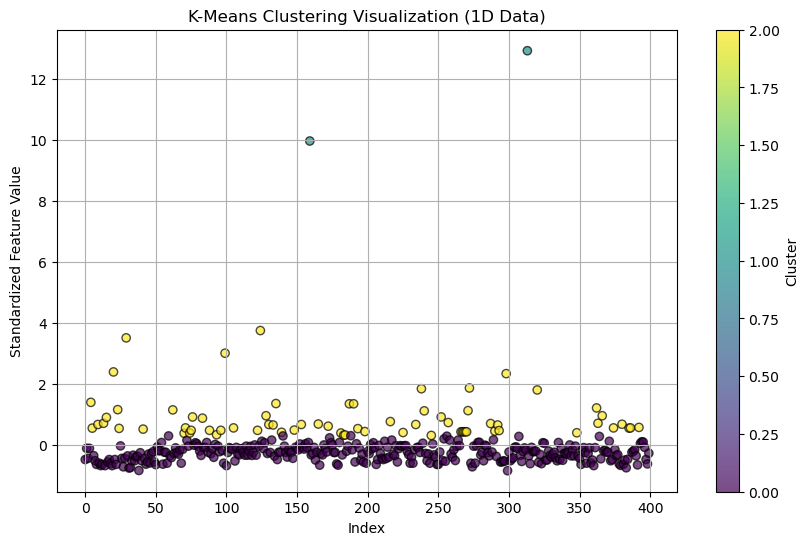

In [7]:

# "How are the prices of Air BnB's different based on the geographic region of the property?"

# Explanation:
# The features used:
    
# price: Represents the price of the property, indicating economic characteristics.
# neighbourhood_cleansed: Encodes the geographic regions of the properties.

# The goal:
# Group properties into clusters based on price and neighborhood information.
# Analyze how the geographic regions (neighbourhood_cleansed) and price levels interact and whether certain clusters
# of neighborhoods have similar price ranges.

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



# Select relevant features for clustering
features = ['price', 'neighbourhood_cleansed']

# Ensure selected columns exist in the dataset
available_columns = [col for col in features if col in dataset.columns]

# Filter the dataset for available columns
dataset = dataset[available_columns]

# Drop missing values
dataset = dataset.dropna()

# Convert 'price' column to numeric
if 'price' in dataset.columns:
    dataset['price'] = dataset['price'].replace('[\$,]', '', regex=True).astype(float)

# Encode the categorical variable (neighbourhood_cleansed)
if 'neighbourhood_cleansed' in dataset.columns:
    dataset = pd.get_dummies(dataset, columns=['neighbourhood_cleansed'], drop_first=True)

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(dataset)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
clusters = kmeans.fit_predict(X)

# Add cluster labels to the dataset
dataset['Cluster'] = clusters

# Evaluate clustering using Silhouette Score
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Check if PCA can be applied
if X.shape[1] >= 2:
    # Reduce dimensions for visualization using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7, edgecolor='k')
    plt.title("K-Means Clustering Visualization with PCA")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label="Cluster")
    plt.grid(True)
    plt.show()
else:
    # Visualize using the first feature as X and cluster labels
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(X)), X[:, 0], c=clusters, cmap='viridis', alpha=0.7, edgecolor='k')
    plt.title("K-Means Clustering Visualization (1D Data)")
    plt.xlabel("Index")
    plt.ylabel("Standardized Feature Value")
    plt.colorbar(label="Cluster")
    plt.grid(True)
    plt.show()


Normalized Column Names in Dataset:
['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availabilit

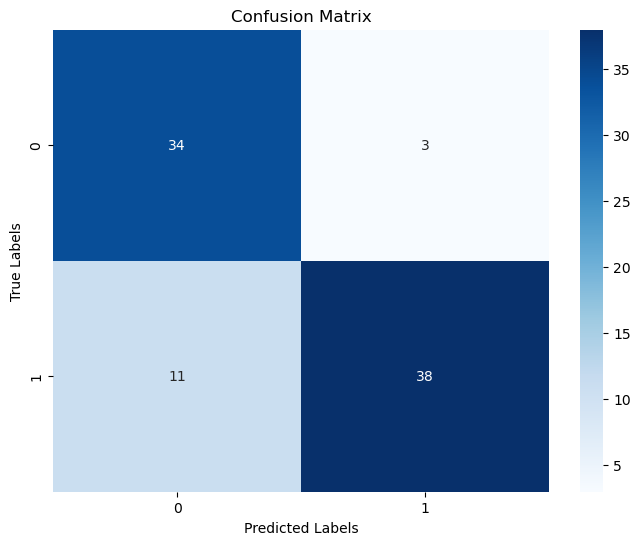

5-Fold Cross-Validation Accuracy Scores: [0.86046512 0.89411765 0.81176471 0.81176471 0.75294118]
Mean Accuracy: 0.83
Standard Deviation: 0.05


In [16]:
# "Does the availability of the property impact whether it receives frequent reviews?"

# This question transforms the continuous target variable reviews_per_month into a classification task by categorizing properties into:

# High Review Frequency: reviews_per_month > threshold
# Low Review Frequency: reviews_per_month <= threshold

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = r"C:\Users\SAIRAM\listings.csv"
dataset = pd.read_csv(file_path)

# Standardize column names (remove spaces, convert to lowercase)
dataset.columns = dataset.columns.str.strip().str.lower()

# Display normalized column names for verification
print("Normalized Column Names in Dataset:")
print(dataset.columns.tolist())

# Select relevant features for prediction
features = ['availability_365', 'number_of_reviews']
target = 'reviews_per_month'

# Ensure selected columns exist in the dataset
available_columns = [col for col in features + [target] if col in dataset.columns]

# Filter the dataset for available columns
dataset = dataset[available_columns]

# Handle missing values using imputation
imputer = SimpleImputer(strategy='mean')  # Replace missing values with column mean
dataset[features] = imputer.fit_transform(dataset[features])  # Impute features only

# Binarize the target variable for classification
threshold = 1.0  # Define a threshold for high vs. low review frequency
dataset['high_review_frequency'] = (dataset[target] > threshold).astype(int)

# Split dataset into features (X) and target (y)
X = dataset[features]
y = dataset['high_review_frequency']

# Ensure there are no empty rows
if dataset.empty:
    raise ValueError("Dataset is empty after preprocessing. Check feature selection or missing data.")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# K-Fold Cross-Validation
k = 5  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

print(f"{k}-Fold Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")


Mean Absolute Error (MAE): 0.92
Mean Squared Error (MSE): 1.17
R² Score: 0.62


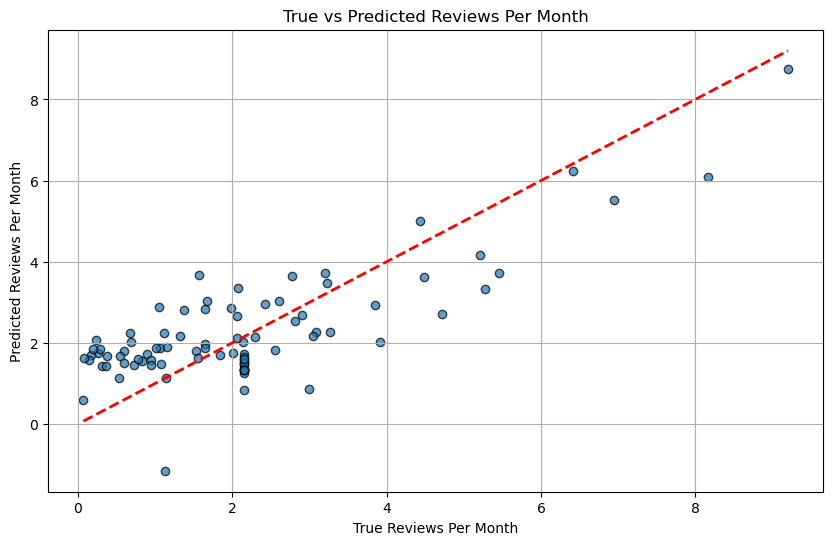

In [11]:
# Reseach Question:"Does the availability of the property impact the reviews per month?"
# Linear Regression
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt

# Select relevant columns
selected_columns = ['availability_365', 'number_of_reviews', 'review_scores_rating',
                    'price', 'minimum_nights', 'accommodates', 'reviews_per_month']
dataset = dataset[selected_columns]

# Convert 'price' to numeric by removing the '$' sign and commas, then converting to float
dataset['price'] = dataset['price'].replace('[\$,]', '', regex=True).astype(float)

# Handle missing values using imputation (mean strategy)
imputer = SimpleImputer(strategy='mean')
dataset_imputed = pd.DataFrame(imputer.fit_transform(dataset), columns=selected_columns)

# Split dataset into features (X) and target (y)
X = dataset_imputed.drop('reviews_per_month', axis=1)
y = dataset_imputed['reviews_per_month']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

# Print the evaluation results in the specified format
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("True vs Predicted Reviews Per Month")
plt.xlabel("True Reviews Per Month")
plt.ylabel("Predicted Reviews Per Month")
plt.grid(True)
plt.show()


Mean Absolute Error (MAE): 26.36
Mean Squared Error (MSE): 1370.06
R² Score: 0.53


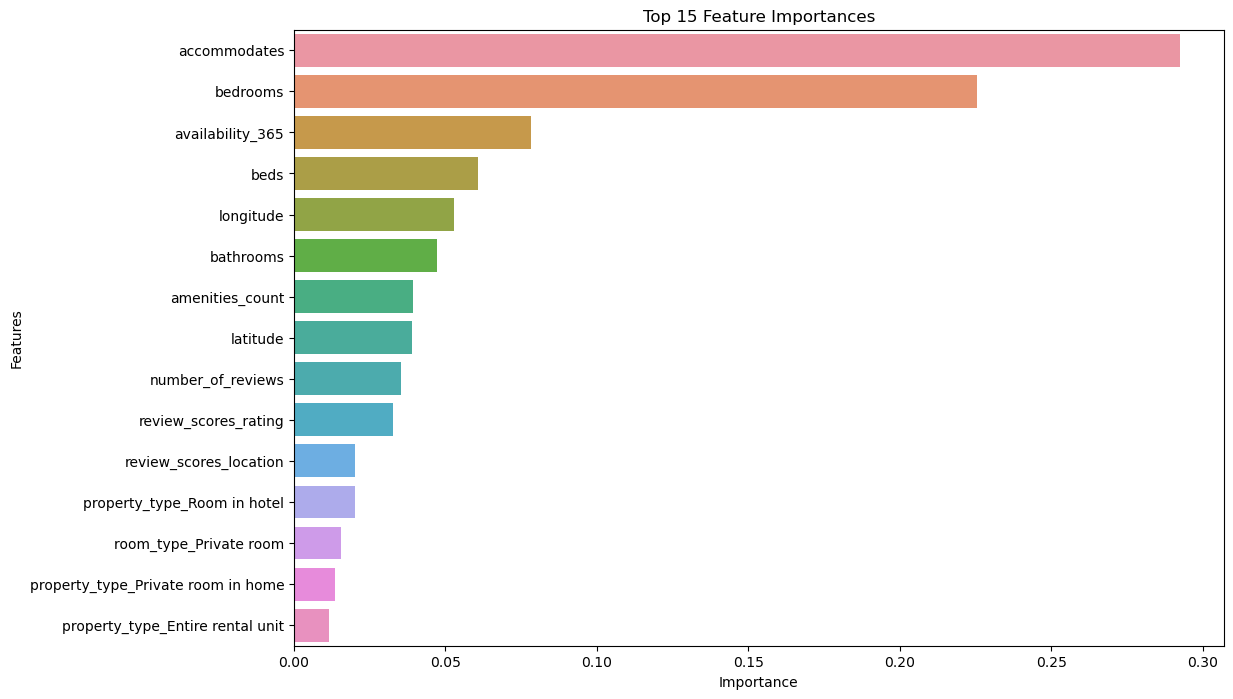

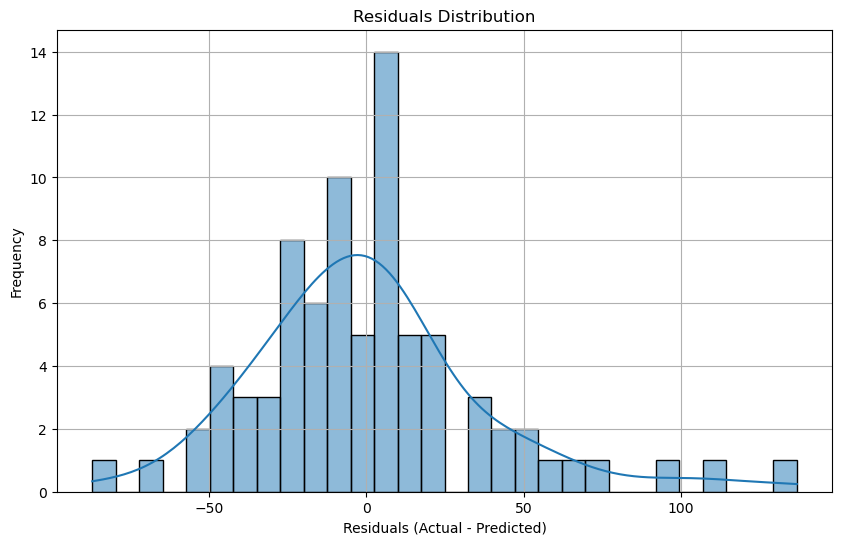

In [36]:
# Research Question "Can we predict the price of the property based on the reviews, location, and other attributes of the data?"
# Random Forest Regressor
    
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Select relevant columns for predicting price
selected_columns = ['latitude', 'longitude', 'review_scores_rating', 'review_scores_location',
                    'number_of_reviews', 'availability_365', 'accommodates', 'bathrooms',
                    'bedrooms', 'beds', 'property_type', 'room_type', 'amenities', 'price']

dataset_price = dataset[selected_columns]

# Drop rows where 'price' is missing
dataset_price = dataset_price.dropna(subset=['price'])

# Convert 'price' to numeric by removing the '$' sign and commas
dataset_price['price'] = dataset_price['price'].replace('[\$,]', '', regex=True).astype(float)

# Feature engineering by Counting the number of amenities
dataset_price['amenities_count'] = dataset_price['amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Drop the original 'amenities' column
dataset_price = dataset_price.drop('amenities', axis=1)

# One-hot encode categorical features ('property_type' and 'room_type')
dataset_price = pd.get_dummies(dataset_price, columns=['property_type', 'room_type'], drop_first=True)

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
dataset_imputed = pd.DataFrame(imputer.fit_transform(dataset_price), columns=dataset_price.columns)

# Handle outliers in 'price' by capping at the 95th percentile
price_cap = dataset_imputed['price'].quantile(0.95)
dataset_imputed['price'] = np.where(dataset_imputed['price'] > price_cap, price_cap, dataset_imputed['price'])

# Split dataset into features (X) and target (y)
X = dataset_imputed.drop('price', axis=1)
y = dataset_imputed['price']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance Plot
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feat_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feat_importances_df = feat_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feat_importances_df[:15])
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Absolute Error (MAE): 25.71
Mean Squared Error (MSE): 1344.41
R² Score: 0.54


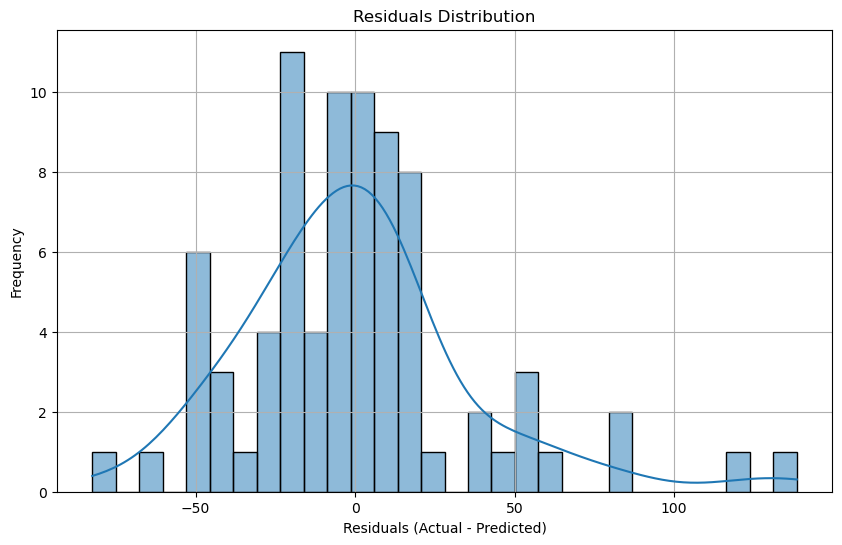

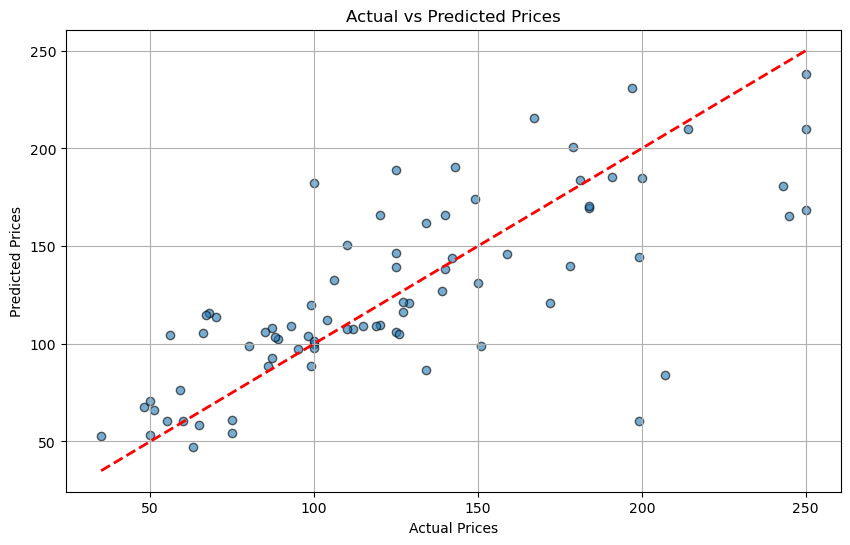

In [49]:
# Research Question "Can we predict the price of the property based on the reviews, location, and other attributes of the data?"
# Perform hyperparameter tuning using the Random Forest Regressor.
from sklearn.model_selection import GridSearchCV
# Expanded parameter grid for further hyperparameter tuning
param_grid_expanded = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search_expanded = GridSearchCV(estimator=rf_model, param_grid=param_grid_expanded, cv=3, n_jobs=-1, verbose=2)
grid_search_expanded.fit(X_train, y_train)

# Get the best estimator and parameters
best_rf_model_expanded = grid_search_expanded.best_estimator_
best_params_expanded = grid_search_expanded.best_params_

# Predict on test data using the best model
y_pred_expanded = best_rf_model_expanded.predict(X_test)

# Evaluate model performance
mae_expanded = mean_absolute_error(y_test, y_pred_expanded)
mse_expanded = mean_squared_error(y_test, y_pred_expanded)
r2_expanded = r2_score(y_test, y_pred_expanded)

# Display results
print(f"Best Parameters: {best_params_expanded}")
print(f"Mean Absolute Error (MAE): {mae_expanded:.2f}")
print(f"Mean Squared Error (MSE): {mse_expanded:.2f}")
print(f"R² Score: {r2_expanded:.2f}")
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Residual Plot
residuals = y_test - y_pred_expanded

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 3. Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_expanded, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()



In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the path to the uploaded dataset
file_path = r"C:\Users\SAIRAM\listings.csv"

# Read the CSV file into a DataFrame
dataset = pd.read_csv(file_path)

# Select relevant columns for predicting price
selected_columns = ['latitude', 'longitude', 'review_scores_rating', 'review_scores_location',
                    'number_of_reviews', 'availability_365', 'accommodates', 'bathrooms',
                    'bedrooms', 'beds', 'price']

dataset_price = dataset[selected_columns]

# Drop rows where 'price' is missing
dataset_price = dataset_price.dropna(subset=['price'])

# Convert 'price' to numeric by removing the '$' sign and commas
dataset_price['price'] = dataset_price['price'].replace('[\$,]', '', regex=True).astype(float)

# Handle missing values using mean imputation for the other columns
imputer = SimpleImputer(strategy='mean')
dataset_imputed = pd.DataFrame(imputer.fit_transform(dataset_price), columns=selected_columns)

# Handle outliers in 'price' by capping at the 95th percentile
price_cap = dataset_imputed['price'].quantile(0.95)
dataset_imputed['price'] = np.where(dataset_imputed['price'] > price_cap, price_cap, dataset_imputed['price'])

# Split dataset into features (X) and target (y)
X = dataset_imputed.drop('price', axis=1)
y = dataset_imputed['price']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize KNN Regressor
knn = KNeighborsRegressor()

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best estimator and parameters
best_knn_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict on test data using the best model
y_pred = best_knn_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Best Parameters: {best_params}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Mean Absolute Error (MAE): 25.90
Mean Squared Error (MSE): 1462.97
R² Score: 0.50
